# Predictive Modeling for Flight delays

### 1. Introduction

#### 1.1. Business problem and its importance:
The business problem revolves around predicting flight delays accurately. Flight delays incur significant costs for both airlines and passengers, leading to dissatisfaction, operational disruptions, and financial losses. By accurately predicting flight delays, airlines can proactively manage schedules, reduce disruptions, optimize resources, and enhance passenger experience. This is crucial in an industry where punctuality is paramount and delays can have cascading effects on operations and customer satisfaction.

#### 1.2. Project objectives:
The primary objective of the project is to build a machine learning model to predict flight delays based on various input variables. The dataset includes information on delays caused by aircraft, the airline, air system, weather, departure time, and distance between airports. The model selection process involves evaluating different regression models and selecting the one with the highest R-squared score on the test dataset. The selected model is then saved and used to make predictions on new flight data.

#### 1.3. Primary goal and business impact:
The primary goal is to provide actionable insights to airlines, airports, and passengers to mitigate the impact of flight delays. By accurately predicting delays, airlines can optimize flight schedules, allocate resources efficiently, minimize operational disruptions, and improve overall punctuality. Passengers can make informed decisions, such as adjusting travel plans or choosing alternative flights, reducing inconvenience and stress associated with delays. Ultimately, the project's success will contribute to enhancing operational efficiency, customer satisfaction, and profitability within the aviation industry.

#### 1.4. Implications of the project:
The implications of the project are multifaceted. For airlines and airports, accurate flight delay predictions can lead to cost savings through improved resource allocation, reduced compensation payouts, and enhanced operational efficiency. Passengers benefit from better travel planning, reduced wait times, and increased transparency regarding potential delays. Moreover, the project's success may drive innovation in predictive analytics and data-driven decision-making across the aviation sector, fostering a culture of continuous improvement and optimization.

In [1]:
#importing all the relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 2. Describing dataset

#### 2.1. The dataset is been gathered from Kaggle website and read from "flights.csv".
It contains the dataset that consists of domestic flight details from 2015. It includes factors that influence air travel disruptions.

In [2]:
#Reading the csv file
flight=pd.read_csv("flights.csv")
print(flight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5821 non-null   int64  
 1   MONTH                5821 non-null   int64  
 2   DAY                  5821 non-null   int64  
 3   DAY_OF_WEEK          5821 non-null   int64  
 4   AIRLINE              5821 non-null   object 
 5   FLIGHT_NUMBER        5821 non-null   int64  
 6   TAIL_NUMBER          5805 non-null   object 
 7   ORIGIN_AIRPORT       5821 non-null   object 
 8   DESTINATION_AIRPORT  5821 non-null   object 
 9   SCHEDULED_DEPARTURE  5821 non-null   int64  
 10  DEPARTURE_TIME       5730 non-null   float64
 11  DEPARTURE_DELAY      5730 non-null   float64
 12  TAXI_OUT             5728 non-null   float64
 13  WHEELS_OFF           5728 non-null   float64
 14  SCHEDULED_TIME       5821 non-null   int64  
 15  ELAPSED_TIME         5713 non-null   f

#### 2.2. Below are the input and output variables
##### Input-
LATE_AIRCRAFT_DELAY: Delay caused by aircraft<br/>
AIRLINE_DELAY: Delay caused by the airline<br/>
AIR_SYSTEM_DELAY: Delay caused by air system<br/>
WEATHER_DELAY: Delay caused by weather<br/>
DEPARTURE_TIME: WHEEL_OFF - TAXI_OUT<br/>
DEPARTURE_DELAY: Total Delay on Departure<br/>
DISTANCE: Distance between two airports<br/>
##### Output-
ARRIVAL_DELAY: ARRIVAL_TIME - SCHEDULED_ARRIVAL

### 3. Descriptive Analysis

#### 3.1. Total Number of Rows and Columns

In [3]:
#Number of rows
print("Total No. of rows : {}".format(len(flight)))

Total No. of rows : 5821


In [4]:
#The number of columns
print("Total No. of columns : {}".format(len(flight.columns)))

Total No. of columns : 31


#### 3.2. Percent of missing values by columns

In [5]:
# Percent of missing values by columns
missing_percent = (flight.isnull().sum() / len(flight)) * 100
print("Percent of missing values by columns:")
print(missing_percent)

Percent of missing values by columns:
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.274867
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.563305
DEPARTURE_DELAY         1.563305
TAXI_OUT                1.597664
WHEELS_OFF              1.597664
SCHEDULED_TIME          0.000000
ELAPSED_TIME            1.855351
AIR_TIME                1.855351
DISTANCE                0.000000
WHEELS_ON               1.614843
TAXI_IN                 1.614843
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.614843
ARRIVAL_DELAY           1.855351
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.402336
AIR_SYSTEM_DELAY       81.583920
SECURITY_DELAY         81.583920
AIRLINE_DELAY          81.583920
LATE_

In [6]:
# Missing values in departure and arrival delays
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 91
The missing values in Arrival delays: 108


In [7]:
#Top 10 values where the arrival and departure delays are missing
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,NaN,NaN,31.0,1221.0
359,NaN,NaN,NaN,NaN


The absence of data in both departure and arrival delays typically aligns with the same instances. In many cases, the departure and arrival times are also missing for these corresponding instances lacking departure and arrival delays. We might speculate that arrival delays have a higher rate of missing values compared to departure delays due to two potential reasons:
1. It could be the flight's inaugural commercial operation, resulting in no prior commercial arrival data, or
2. It could simply be a case of missed data entry. However, without additional information, it's challenging to confirm the exact cause.

Therefore, we will proceed by removing the missing values from both departure and arrival delays in our dataset.

In [8]:
#Dropping the null values in departure and arrival delay
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)

In [9]:
#Total number of observations after dropping the null values of departure and arrival delay
len(flight)

5713

In [10]:
# The current number of missing values in departyure and arrival delays
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 0
The missing values in Arrival delays: 0


#### 3.3. Correlations, Means, Medians

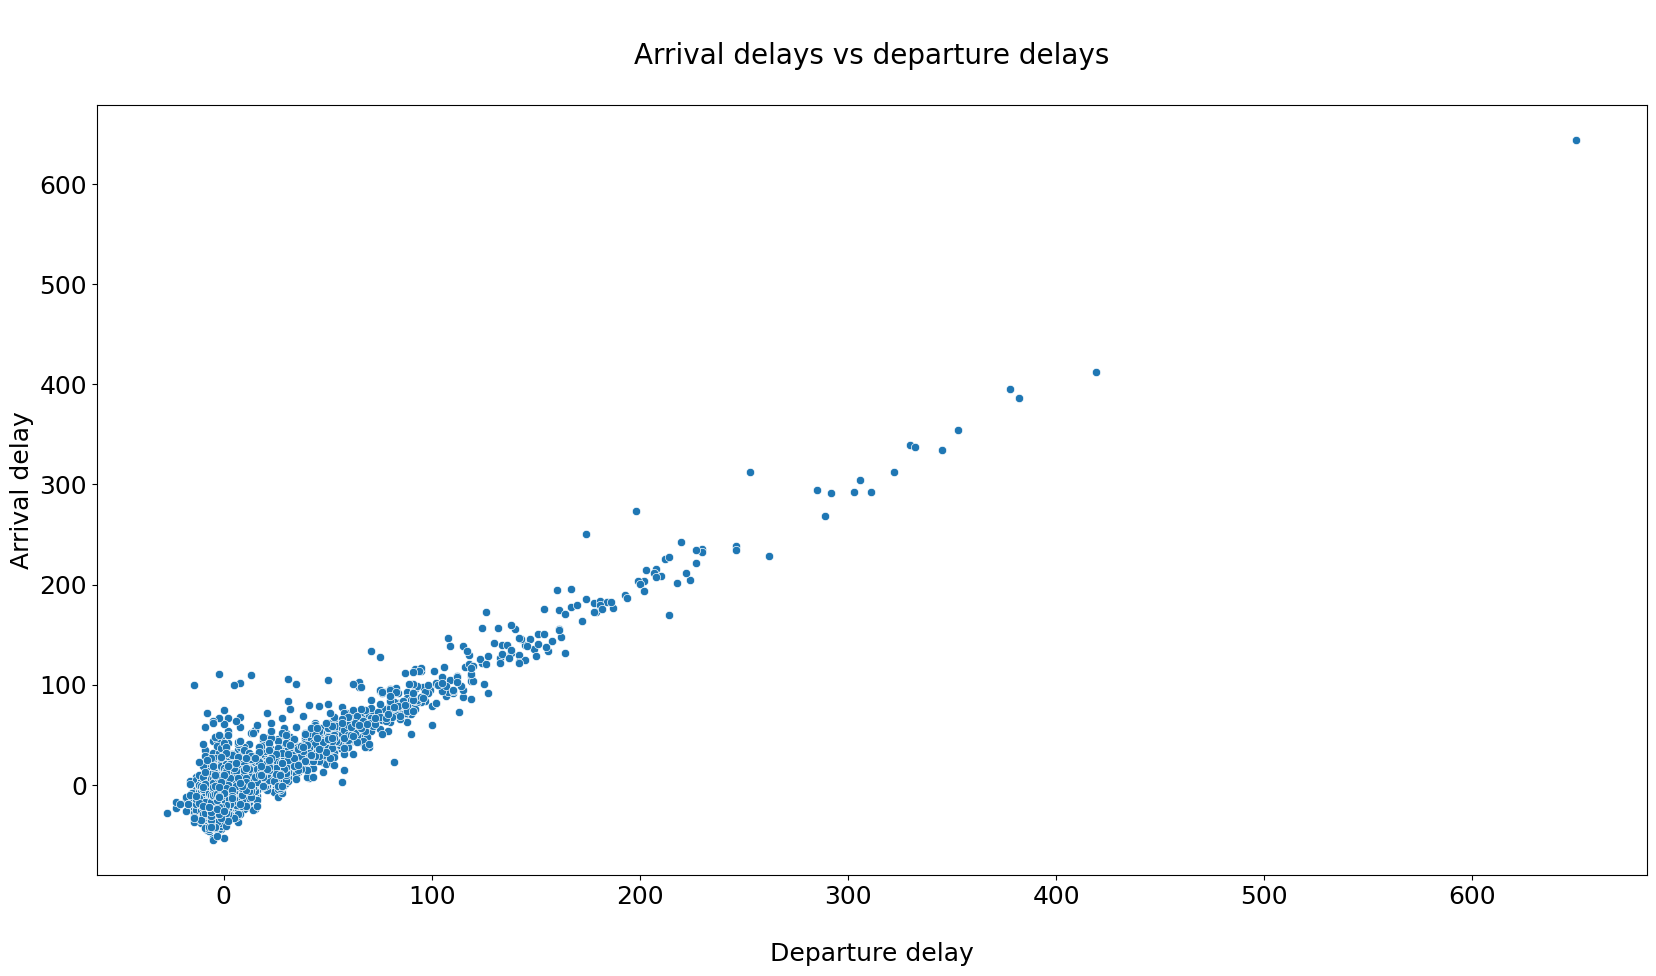

In [11]:
#Scatter plot between arrival and departure delay
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay" ,fontsize=18)
plt.ylabel("Arrival delay" ,fontsize=18)
plt.title("\nArrival delays vs departure delays\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

There exists a relatively linear relationship between arrival delay and departure delay. This implies that flights departing late tend to arrive late, and conversely, flights departing on time are more likely to arrive on time.

In [12]:
# Mean and median of arrival and departure delay
print("Average departure delay : {} " .format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 8.886574479257833 
Median departure delay : -2.0 
Average arrival delay : 3.9882723612812883 
Median arrival delay : -5.0 


The average departure delay exceeds the average arrival delay. While the exact reason for this disparity is unknown, we can speculate on potential explanations for why departure delay is greater than arrival delay:

1. Departure involves numerous factors such as airline delay, security delay, and weather delay, compared to arrival delay which is influenced by fewer factors like weather delay.
2. Often, longer distances traveled may compensate for departure delays.

Similarly, the median departure delay surpasses the arrival delay median, indicating that departure delay tends to be higher than arrival delay on average.

### 4. Data Preprocessing

#### 4.1. Variable Treatment

##### Departure and arrival delays based on distance

In [13]:
#Creating a dataframe for only the departure delays (positive values)
depart_delay_positive=flight[(flight['DEPARTURE_DELAY']>0) ]
depart_delay_positive['DEPARTURE_DELAY']

3        1.0
7       32.0
12      13.0
14      12.0
15       6.0
        ... 
5813    22.0
5814     4.0
5817    38.0
5818     8.0
5820     2.0
Name: DEPARTURE_DELAY, Length: 2115, dtype: float64

In [14]:
# Extracting departure delay and distance from flight dataset and sorting in descending order by distance first and then by departure delay 
depart_dist=flight[['DEPARTURE_DELAY','DISTANCE']].sort_values(by=['DISTANCE','DEPARTURE_DELAY'],ascending=False)
depart_dist.head(15) # Top 15 long distance flights

,DEPARTURE_DELAY,DISTANCE
2583,-7.0,4983
1529,-9.0,4983
3495,1.0,4817
1280,0.0,4817
1684,-3.0,4502
3511,23.0,3801
2820,19.0,3417
4522,5.0,3365
5762,8.0,3329
3969,25.0,3043


In [15]:
depart_dist.tail(15) # Top 15 short distance flights

,DEPARTURE_DELAY,DISTANCE
609,-3.0,73
557,0.0,69
5234,2.0,68
3473,0.0,68
1432,-8.0,68
5190,78.0,67
187,24.0,67
3695,15.0,67
2190,0.0,67
678,-9.0,67


In [16]:
flight[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].corr() #Correlation of distance, departure delay, arrival delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
DEPARTURE_DELAY,1.000000,0.936069,0.023095
ARRIVAL_DELAY,0.936069,1.000000,-0.027935
DISTANCE,0.023095,-0.027935,1.000000


There is a notable level of variability observed in both arrival delay and distance, as well as departure delay and distance. Distance does not appear to be a reliable predictor of delay. Additionally, there seems to be minimal correlation between departure delay and distance, as well as arrival delay and distance.

In [17]:
# Top 10 long distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
3495,1.0,-18.0,4817
3511,23.0,10.0,3801
2820,19.0,48.0,3417
4522,5.0,-13.0,3365
5762,8.0,-19.0,3329
3969,25.0,26.0,3043
5814,4.0,-13.0,2979
5530,13.0,-6.0,2845
728,1.0,-38.0,2717
2513,4.0,-23.0,2704


In [18]:
# Top 10 shorty distance flights with departure delay(positive) and their corresponding arrival delay
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).tail(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
81,25.0,31.0,83
1053,17.0,15.0,74
3442,33.0,23.0,74
503,99.0,95.0,73
2818,1.0,-3.0,73
4062,29.0,17.0,73
5234,2.0,-8.0,68
5190,78.0,64.0,67
187,24.0,20.0,67
3695,15.0,18.0,67


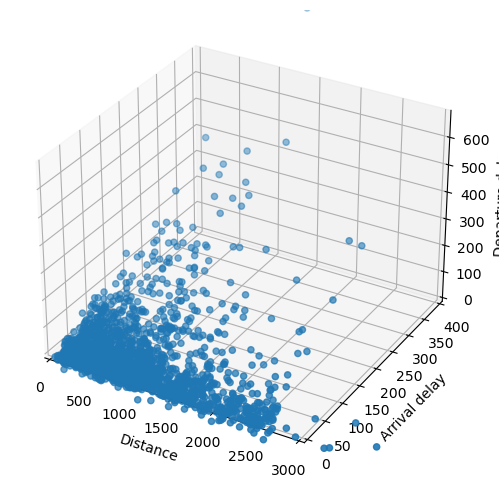

In [19]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(depart_delay_positive['DISTANCE'], depart_delay_positive['ARRIVAL_DELAY'], depart_delay_positive['DEPARTURE_DELAY'])
ax.set_xlabel('Distance')
ax.set_ylabel('Arrival delay')
ax.set_zlabel('Departure delay')
ax.set_xlim(0, 3000, emit=True) # Limiting x axis for better view of data points
ax.set_ylim(0, 400, emit=True) # Limiting y axis for better view of data points
ax.set_zlim(0, None, emit=True) # Limiting z axis for better view of data points
plt.show()

Despite the considerable distance traveled, it's evident that distance alone doesn't compensate for departure delays. This is highlighted by the prevalence of arrival delays (positive values) despite the long distances covered by the flights.

##### Analysing the different delay types

In [20]:
#average of different delay types
delay_type=pd.DataFrame(flight['AIR_SYSTEM_DELAY'].describe())
delay_type['SECURITY_DELAY']=pd.DataFrame(flight['SECURITY_DELAY'].describe())
delay_type['AIRLINE_DELAY']=pd.DataFrame(flight['AIRLINE_DELAY'].describe())
delay_type['LATE_AIRCRAFT_DELAY']=pd.DataFrame(flight['LATE_AIRCRAFT_DELAY'].describe())
delay_type['WEATHER_DELAY']=pd.DataFrame(flight['WEATHER_DELAY'].describe())
delay_type=pd.DataFrame(delay_type.iloc[1])
delay_type

,mean
AIR_SYSTEM_DELAY,14.319963
SECURITY_DELAY,0.113806
AIRLINE_DELAY,18.119403
LATE_AIRCRAFT_DELAY,20.514925
WEATHER_DELAY,3.616604


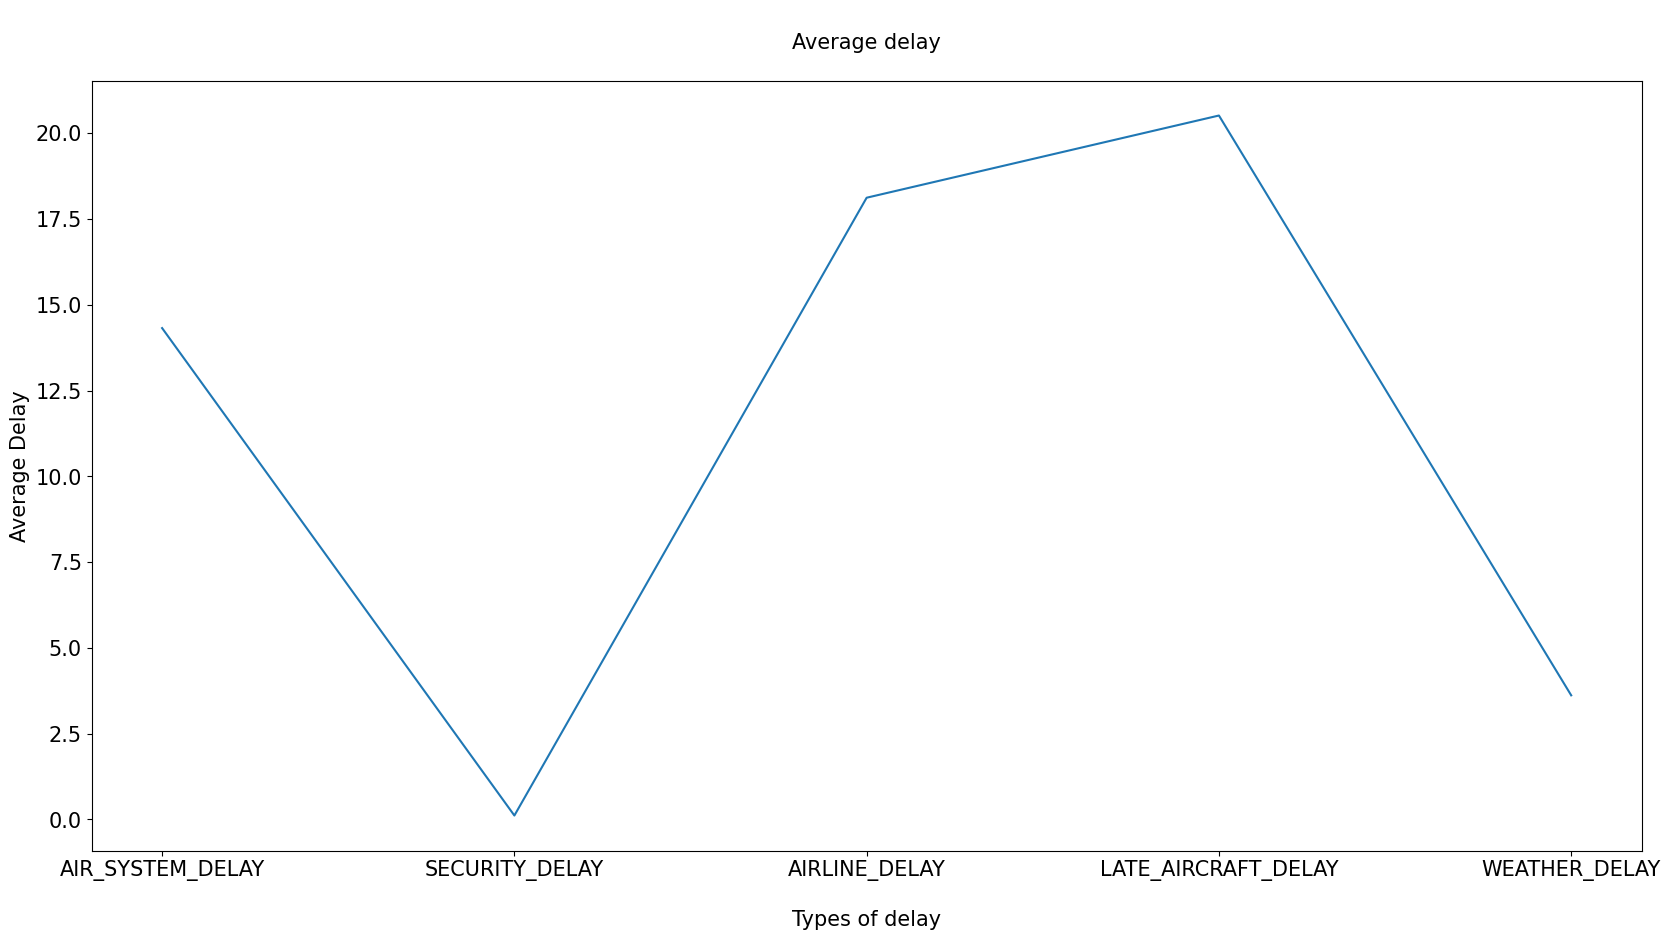

In [21]:
plt.figure(figsize=(20,10))
plt.plot(delay_type)
plt.tick_params(labelsize=15)
plt.xlabel("\nTypes of delay" ,fontsize=15)
plt.ylabel("Average Delay" ,fontsize=15)
plt.title("\nAverage delay\n",fontsize=15)
plt.show()

The most significant delay is attributed to delays caused by the aircraft, with an average delay of 20.51 minutes. Conversely, the least delay is associated with security-related issues, with an average delay of 0.11 minutes.

#### 4.2. Dropping unneccessary values

In [22]:
flight.dropna(subset=["WEATHER_DELAY"],how="all",inplace=True) #removing the missing values in WEATHER_DELAY


In [23]:
flight.isnull().sum() #the remaining null values

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

#### 4.3. Variable Selection

In [24]:
X_cat_1=flight.iloc[:,31:] # Adding only the categorical dummy variables 
X_num_1=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','DISTANCE']]#Adding only the nuermical variables
X_1=pd.concat([X_num_1,X_cat_1],axis=1) #Combining them
X_1.head() #the final predictor variabes for the model

,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,AIR_SYSTEM_DELAY,WEATHER_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE
7,21.0,11.0,4.0,0.0,1349.0,32.0,222
9,0.0,0.0,23.0,0.0,1603.0,0.0,1476
19,0.0,8.0,13.0,0.0,1128.0,8.0,912
21,50.0,0.0,31.0,0.0,1428.0,50.0,458
22,89.0,25.0,0.0,0.0,1644.0,101.0,100


In [25]:
y_1=flight['ARRIVAL_DELAY'] #response variable for the model

### 5. Fitting Models

#### 5.1. Fitting multiple models with varying parameters

In [26]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [27]:
# Fitting multiple models with varying parameters
# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Model 2: Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Model 3: OLS Regression using statsmodel
X_con_1 = sm.add_constant(X_1)
ols_model = sm.OLS(y_1, X_con_1).fit()

In [28]:
# Extracting coefficients and p-values for Linear Regression
linear_reg_coefs = pd.DataFrame({'Coef': linear_reg.coef_}, index=X_1.columns)
linear_reg_coefs['p-values'] = None  # Placeholder for p-values
# Calculate p-values
from scipy.stats import t
n = X_train.shape[0]
p = X_train.shape[1]
t_vals = linear_reg.coef_ / (ols_model.mse_resid / (n - p) * (X_train.values.std(axis=0) ** 2)) ** 0.5
p_vals = 2 * (1 - t.cdf(abs(t_vals), n - p))
linear_reg_coefs['p-values'] = p_vals

# Round coefficients and p-values
linear_reg_coefs = linear_reg_coefs.round(6)

In [29]:
# Extracting coefficients and p-values for Random Forest Regressor
random_forest_coefs = pd.DataFrame({'Coef': random_forest_reg.feature_importances_}, index=X_1.columns)
random_forest_coefs['p-values'] = None  # Placeholder for p-values
random_forest_coefs = random_forest_coefs.round(6)  # Round coefficients and p-values

In [30]:
# Extracting coefficients and p-values for OLS Regression
ols_coefs = pd.DataFrame(ols_model.params, columns=['Coef'])
ols_coefs['p-values'] = ols_model.pvalues
ols_coefs = ols_coefs.round(6)  # Round coefficients and p-values

#### 5.2. Summarize perfomance indicators of models

In [31]:
# Displaying the results
print("Linear Regression Coefficients and p-values:")
print(linear_reg_coefs)

print("\nRandom Forest Coefficients and p-values:")
print(random_forest_coefs)

print("\nOLS Regression Coefficients and p-values:")
print(ols_coefs)

# Model Evaluation
# Model Evaluation
models = {'Linear Regression': linear_reg, 
          'Random Forest Regressor': random_forest_reg}

r_squared_values = {}  # Dictionary to store R-squared values

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.6f}")
    r_squared_values[name] = r2  # Store R-squared value for each model

# OLS Regression
X_con_test = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_con_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)
print("\nModel: OLS Regression")
print(f"Mean Squared Error: {mse_ols:.6f}")
print(f"R-squared: {r2_ols:.6f}")
r_squared_values['OLS Regression'] = r2_ols  # Store R-squared value for OLS model


Linear Regression Coefficients and p-values:
                         Coef  p-values
LATE_AIRCRAFT_DELAY  0.976703  0.687049
AIRLINE_DELAY        0.977019  0.708875
AIR_SYSTEM_DELAY     0.982641  0.586002
WEATHER_DELAY        0.979087  0.476062
DEPARTURE_TIME      -0.000173  0.999995
DEPARTURE_DELAY      0.020063  0.995787
DISTANCE             0.000143  0.999997

Random Forest Coefficients and p-values:
                         Coef p-values
LATE_AIRCRAFT_DELAY  0.007105     None
AIRLINE_DELAY        0.020805     None
AIR_SYSTEM_DELAY     0.040545     None
WEATHER_DELAY        0.001279     None
DEPARTURE_TIME       0.004905     None
DEPARTURE_DELAY      0.920572     None
DISTANCE             0.004788     None

OLS Regression Coefficients and p-values:
                         Coef  p-values
const                0.347488  0.096007
LATE_AIRCRAFT_DELAY  0.981899  0.000000
AIRLINE_DELAY        0.982301  0.000000
AIR_SYSTEM_DELAY     0.986222  0.000000
WEATHER_DELAY        0.984222  0.00000

#### 5.3. Selecting the best model using a test dataset

In [32]:
# Find the model with the highest R-squared value
best_model_name = max(r_squared_values, key=r_squared_values.get)
best_r_squared = r_squared_values[best_model_name]

print(f"\nThe best model is: {best_model_name} with R-squared score: {best_r_squared:.6f}")


The best model is: OLS Regression with R-squared score: 0.999971


### Interpretations
With all other factors held constant, a one-minute increase in late aircraft delay is associated with an increase in arrival delay of approximately 0.981899 minutes. Similarly, for airline delay, a one-minute increase leads to an increase in arrival delay of around 0.982301 minutes.

## Predicting Arrival Delay for a Specific Flight



In [33]:
# If OLS Regression encountered an error, fall back to Linear Regression
if best_model_name == 'OLS Regression':
    best_model_name = 'Linear Regression'
    best_model = models['Linear Regression']
else:
    best_model = models[best_model_name]
# Saving the best model
joblib.dump(best_model, 'trained_model.joblib')

# Load the trained model
model = joblib.load('trained_model.joblib')

In [34]:
# Prepare input data for the specific flight
flight_data = {   
    'LATE_AIRCRAFT_DELAY': '21.0',
    'AIRLINE_DELAY': '11.0',
    'AIR_SYSTEM_DELAY': '4.0',
    'WEATHER_DELAY': '0.0',
    'DEPARTURE_TIME': '1349.0',
    'DEPARTURE_DELAY': '32.0',
    'DISTANCE': '222'
}

# Convert the flight data into a DataFrame
flight_df = pd.DataFrame(flight_data, index=[0])

# Make predictions
arrival_delay_prediction = model.predict(flight_df)

print("Predicted arrival delay:", arrival_delay_prediction)


Predicted arrival delay: [36.07999571]
